In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset_train = pd.read_csv('^HSItrain.csv')
training_set = dataset_train.iloc[:,1:2].values

In [46]:
dataset_train.shape


(458, 7)

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [48]:
x_train = []
y_train = []
for i in range(60,458):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [49]:
#load data test
dataset_test = pd.read_csv('^HSItest.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [50]:
dataset_test.shape


(34, 7)

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [52]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
398/398 [==============================] - 28s 72ms/step - loss: 0.0673
Epoch 2/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0214
Epoch 3/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0157
Epoch 4/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0121
Epoch 5/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0106
Epoch 6/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0099
Epoch 7/100
398/398 [==============================] - 7s 18ms/step - loss: 0.0092
Epoch 8/100
398/398 [==============================] - 7s 18ms/step - loss: 0.0087
Epoch 9/100
398/398 [==============================] - 7s 18ms/step - loss: 0.0082
Epoch 10/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0078
Epoch 11/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0077
Epoch 12/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0072


398/398 [==============================] - 7s 17ms/step - loss: 0.0016
Epoch 99/100
398/398 [==============================] - 7s 17ms/step - loss: 0.0017
Epoch 100/100
398/398 [==============================] - 7s 18ms/step - loss: 0.0016


In [53]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,94):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

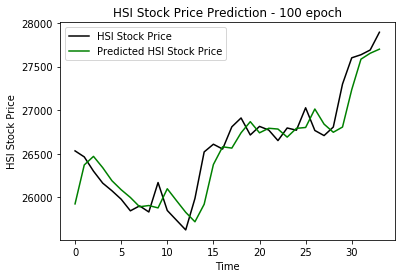

In [54]:
plt.plot(real_stock_price,color='black',label='HSI Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted HSI Stock Price')
plt.title('HSI Stock Price Prediction - 100 epoch')
plt.xlabel('Time')
plt.ylabel('HSI Stock Price')
plt.legend()
plt.show()